In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.metrics as metrics

In [4]:
import statsmodels.formula.api as smp

## Data Prepration

In [238]:
data=pd.read_csv('Car_sales.csv')

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [240]:
data.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [241]:
#Data Manipulation - Changing the data types of variables

In [242]:
now = pd.Timestamp('now')
data['Latest_Launch_days'] = pd.to_datetime(data['Latest_Launch'], format='%m/%d/%Y')    # 1
data['Latest_Launch_days'] = data['Latest_Launch_days'].where(data['Latest_Launch_days'] < now, data['Latest_Launch_days'] -  np.timedelta64(100, 'Y'))   # 2
data['Latest_Launch_days'] = (now - data['Latest_Launch_days']).astype('<m8[D]')    # 3
data.head()
# data = data.drop(['Latest_Launch'],axis=1).head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Latest_Launch_days
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,2694.0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,2938.0
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,2723.0
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,3023.0
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,2811.0


In [243]:
def Manufacturer_rename(x):
    x = x.split('-')
#     print(x)
    if len(x)>=2:
        x = '_'.join(x)
#         print(x)
        return x
    else:
        return ' '.join(x)

In [244]:
data['Manufacturer'] = data.Manufacturer.apply(lambda x: Manufacturer_rename(x))

In [245]:
def model_renameBysize(x):
    x = x.split()
#     print(x)
    if len(x)>=2:
        x = '_'.join(x)
#         print(x)
        return x
    else:
        return ' '.join(x)

In [246]:
data['Model'] = data.Model.apply(lambda x: model_renameBysize(x))

In [247]:
def model_renameByformat(x):
    x = x.split('-')
#     print(x)
    if len(x)>=2:
        x = '_'.join(x)
#         print(x)
        return x
    else:
        return ' '.join(x)

In [248]:
data['Model'] = data.Model.apply(lambda x: model_renameByformat(x))

In [249]:
data = data.drop(['Latest_Launch', 'Latest_Launch_days'], axis=1)

In [250]:
# This Categorical var have no varrience 

data = data.drop(['Model'], axis=1) 

# https://math.stackexchange.com/questions/1135507/variance-measure-for-categorical-data
# https://stats.stackexchange.com/questions/221332/variance-of-a-distribution-of-multi-level-categorical-data


In [252]:
# numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
# cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
# print(numeric_var_names)
# print(cat_var_names)

In [253]:
numerical_var = data.dtypes.loc[(data.dtypes=='float64')|(data.dtypes=='int64')].index.tolist()
categorical_var = data.dtypes.loc[(data.dtypes=='object')].index.tolist()

In [254]:
data_num = data[numerical_var]

In [255]:
data_cat = data[categorical_var]

In [256]:
data.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [257]:
#Handling Outliers - Numerical
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))
# data.loc[data.Price_in_thousands>78.47980000000007]
# data.Price_in_thousands.quantile(0.99)

In [258]:
#Handling missings

In [259]:
#Numeric data
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

In [260]:
#Categorical data
def Cat_Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

data_cat=data_cat.apply(lambda x: Cat_Missing_imputation(x))

In [261]:
# An utility function to create dummy variable

In [262]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

In [263]:
data_cat.head()

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [264]:
# Concated new data

In [265]:
carData = pd.concat([data_num, data_cat], axis=1)
carData.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


In [266]:
# data = data.drop(['Latest_Launch_days'], axis=1)

In [267]:
#Assumptions of Regression

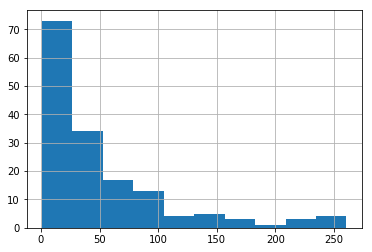

In [268]:
carData.Sales_in_thousands.hist()

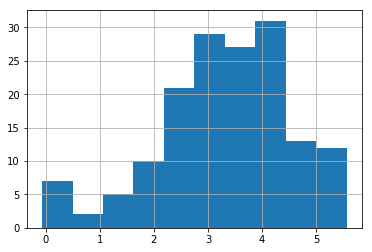

In [269]:
np.log(carData.Sales_in_thousands).hist()

C:\Users\AyushK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


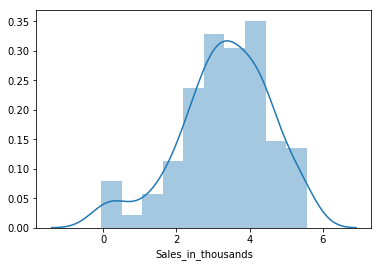

In [270]:
sns.distplot(np.log(carData.Sales_in_thousands))

By tranforming the independent variable `carData.Sales_in_thousands` by log we get a normal curve.

In [271]:
carData["ln_Sales_in_thousands"]= np.log(carData["Sales_in_thousands"])

## Variable Reduction

In [383]:
# correlation matrix (ranges from 1 to -1)

In [384]:
corrm=carData.corr()
corrm.to_csv('corrm.csv')

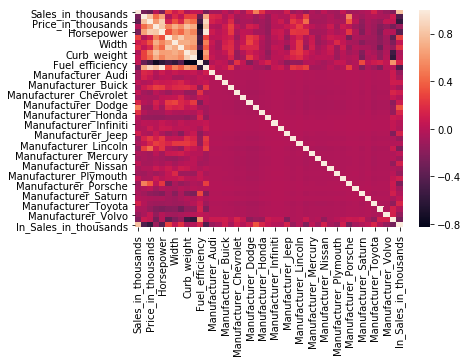

In [386]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(carData.corr())

In [387]:
# Recursive Feature Elimination

In [565]:
features = carData[carData.columns.difference( ['ln_Sales_in_thousands', 'Sales_in_thousands'] )]
target = carData['ln_Sales_in_thousands']

In [567]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import itertools

lm = LinearRegression()

# create the RFE model and select 10 attributes
rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(features, target)

In [568]:
rfe.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [569]:
feature_map = [(i, v) for i,v in itertools.zip_longest(features.columns, rfe.get_support())   ]

In [570]:
feature_map

[('Curb_weight', False),
 ('Engine_size', False),
 ('Fuel_capacity', False),
 ('Fuel_efficiency', False),
 ('Horsepower', False),
 ('Length', False),
 ('Manufacturer_Audi', False),
 ('Manufacturer_BMW', False),
 ('Manufacturer_Buick', True),
 ('Manufacturer_Cadillac', False),
 ('Manufacturer_Chevrolet', True),
 ('Manufacturer_Chrysler', False),
 ('Manufacturer_Dodge', True),
 ('Manufacturer_Ford', True),
 ('Manufacturer_Honda', True),
 ('Manufacturer_Hyundai', True),
 ('Manufacturer_Infiniti', False),
 ('Manufacturer_Jaguar', False),
 ('Manufacturer_Jeep', True),
 ('Manufacturer_Lexus', False),
 ('Manufacturer_Lincoln', False),
 ('Manufacturer_Mercedes_B', False),
 ('Manufacturer_Mercury', False),
 ('Manufacturer_Mitsubishi', False),
 ('Manufacturer_Nissan', True),
 ('Manufacturer_Oldsmobile', False),
 ('Manufacturer_Plymouth', False),
 ('Manufacturer_Pontiac', True),
 ('Manufacturer_Porsche', False),
 ('Manufacturer_Saab', False),
 ('Manufacturer_Saturn', False),
 ('Manufacturer_Subar

In [571]:
RFE_Featuers = features.columns[rfe.get_support()]

In [574]:
RFE_Featuers

Index(['Manufacturer_Buick', 'Manufacturer_Chevrolet', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_Jeep', 'Manufacturer_Nissan', 'Manufacturer_Pontiac',
       'Manufacturer_Toyota'],
      dtype='object')

In [576]:
# F-Regression

In [577]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

F_values, p_values  = f_regression(features, target)

In [578]:
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [579]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [581]:
f_reg_results.sort_values(by=['P_Value'])
#selecting f regression variables with p value upto 0.05

,Variable,F_Value,P_Value
40,four_year_resale_value,38.650949,0.000
35,Power_perf_factor,38.714619,0.000
36,Price_in_thousands,77.686951,0.000
13,Manufacturer_Ford,21.061447,0.000
4,Horsepower,29.701676,0.000
37,Vehicle_type_Passenger,12.462157,0.001
28,Manufacturer_Porsche,10.653178,0.001
38,Wheelbase,12.187805,0.001
21,Manufacturer_Mercedes_B,9.878573,0.002
5,Length,6.965105,0.009


In [ ]:
# varience inflation Factor (VIF)

In [583]:
list_vars = ['four_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Length','Fuel_efficiency','Power_perf_factor','Manufacturer_Audi','Manufacturer_Ford','Manufacturer_Honda','Manufacturer_Jeep','Manufacturer_Lexus','Manufacturer_Mercedes_B','Manufacturer_Nissan','Manufacturer_Plymouth','Manufacturer_Porsche','Manufacturer_Toyota','Manufacturer_Volvo','Vehicle_type_Passenger','Manufacturer_Buick','Manufacturer_Chevrolet','Manufacturer_Dodge','Manufacturer_Ford','Manufacturer_Honda','Manufacturer_Hyundai']

In [584]:
# list_vars = ['four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Length', 'Fuel_efficiency', 'Power_perf_factor', 'Manufacturer_Audi', 'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Mercedes_B', 'Manufacturer_Nissan', 'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Vehicle_type_Passenger', 'Manufacturer_Buick', 'Manufacturer_Chevrolet', 'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda']

In [585]:
# list_vars = ['four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Length', 'Fuel_efficiency', 'Power_perf_factor', 'Manufacturer_Audi', 'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Mercedes_B', 'Manufacturer_Nissan', 'Manufacturer_Porsche', 'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Model_A8', 'Model_Accord', 'Model_Avenger', 'Model_C70', 'Model_CL500', 'Model_Camry', 'Model_Caravan', ]

In [586]:
# list_vars = ['four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Length', 'Fuel_efficiency', 'Power_perf_factor', 'Manufacturer_Audi', 'Manufacturer_Chevrolet', 'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Mercedes_B', 'Manufacturer_Mitsubishi', 'Manufacturer_Nissan', 'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Model_3000GT', 'Model_A8', 'Model_Accord', 'Model_Avenger', 'Model_Breeze', 'Model_C70', 'Model_CL500', 'Model_Camry', 'Model_Caravan', 'Model_Carrera_Cabrio', 'Model_Carrera_Coupe', 'Model_Cavalier', 'Model_Civic', 'Model_Corolla', 'Model_Cutlass', 'Model_Diamante', 'Model_Eldorado', 'Model_Expedition', 'Model_Explorer', 'Model_F_Series', 'Model_Focus', 'Model_GS400', 'Model_GTI', 'Model_Grand_Am', 'Model_Grand_Cherokee', 'Model_Malibu', 'Model_Prowler', 'Model_Ram_Pickup', 'Model_Ranger', 'Model_SL-Class', 'Model_SLK230', 'Model_SW', 'Model_Taurus', 'Model_V40', 'Model_Viper', 'Model_Windstar', 'Vehicle_type_Passenger', 'Manufacturer_Audi', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti', 'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Porsche', 'Manufacturer_Saturn', 'Manufacturer_Volkswagen', 'Model_A4', 'Model_A6', 'Model_A8', 'Model_Accent', 'Model_Beetle', 'Model_Boxter', 'Model_Carrera_Cabrio', 'Model_Carrera_Coupe', 'Model_Cherokee', 'Model_Elantra', 'Model_GTI', 'Model_Golf', 'Model_Grand_Cherokee']

In [587]:
# list_vars = ['four_year_resale_value', 'Manufacturer_Ford', 'Price_in_thousands', 'Horsepower', 'Power_perf_factor', 'Vehicle_type_Passenger', 'Manufacturer_Porsche', 'Wheelbase', 'Manufacturer_Mercedes_B', 'Length', 'Manufacturer_Volvo', 'Manufacturer_Honda']

In [588]:
all_columns = "+".join(list_vars)
my_formula = "ln_Sales_in_thousands~" + all_columns

print(my_formula)

ln_Sales_in_thousands~four_year_resale_value+Price_in_thousands+Engine_size+Horsepower+Wheelbase+Length+Fuel_efficiency+Power_perf_factor+Manufacturer_Audi+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Mercedes_B+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Vehicle_type_Passenger+Manufacturer_Buick+Manufacturer_Chevrolet+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai


### Model_3000GT Not definde issue.

>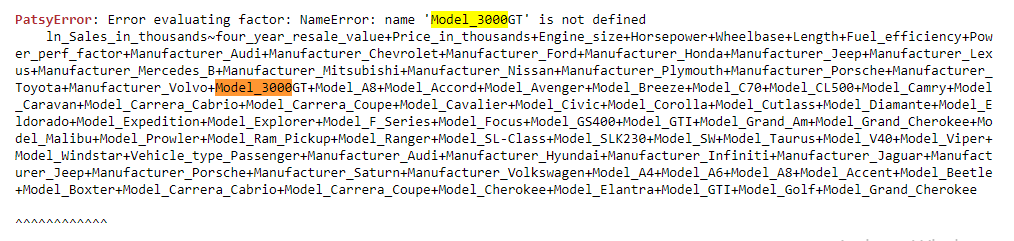

>the model 3000GT is the first variable of the model columns and while converting the cat vars to numerical vars we droped the variable Model_3000GT to avoide multicolarnity, even is the correlation between Ln_saes in thousands and Model_3000GT is high it will not impact our model

In [136]:
# my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Horsepower+Wheelbase+Length+Fuel_efficiency+Manufacturer_Audi+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Mercedes_B+Manufacturer_Nissan+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Model_A8+Model_Accord+Model_Avenger+Model_C70+Model_CL500+Model_Camry+Model_Caravan'

In [137]:
# my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Horsepower+Length+Manufacturer_Audi+Manufacturer_Chevrolet+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Mercedes_B+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Model_A8+Model_Accord+Model_Avenger+Model_Breeze+Model_C70+Model_CL500+Model_Camry+Model_Caravan+Model_Carrera_Coupe+Model_Cavalier+Model_Civic+Model_Corolla+Model_Cutlass+Model_Diamante+Model_Eldorado+Model_Expedition+Model_Explorer+Model_F_Series+Model_Focus+Model_GS400+Model_GTI+Model_Grand_Am+Model_Grand_Cherokee+Model_Malibu+Model_Prowler+Model_Ram_Pickup+Model_Ranger+Model_SL-Class+Model_SLK230+Model_SW+Model_Taurus+Model_V40+Model_Viper+Model_Windstar+Vehicle_type_Passenger+Manufacturer_Audi+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Porsche+Manufacturer_Saturn+Manufacturer_Volkswagen+Model_Accent+Model_Beetle+Model_Carrera_Cabrio+Model_Carrera_Coupe+Model_Cherokee+Model_Elantra+Model_GTI+Model_Golf+Model_Grand_Cherokee'

In [154]:
# my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Length+Manufacturer_Audi+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Mercedes_B+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Vehicle_type_Passenger+Manufacturer_Buick+Manufacturer_Chevrolet+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda'

In [601]:
my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Horsepower+Length+Manufacturer_Audi+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Mercedes_B+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Vehicle_type_Passenger+Manufacturer_Buick+Manufacturer_Chevrolet+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai'

In [602]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# get y and X dataframes based on this regression
y, X = dmatrices(my_formula, carData, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,333.853358,Intercept
1,2.754572,four_year_resale_value
2,2.745432,Horsepower
3,1.872715,Length
12,1.612041,Manufacturer_Porsche
15,1.392067,Vehicle_type_Passenger
9,1.320571,Manufacturer_Mercedes_B
7,1.222732,Manufacturer_Jeep
13,1.176881,Manufacturer_Toyota
18,1.164314,Manufacturer_Dodge


 `Model_Carrera_Cabrio`,
 `Manufacturer_Audi`,
 `Model_A8`,
 `Model_Carrera_Coupe`,
 `Model_A6`,
 `Manufacturer_Porsche`,
 `Model_A4`,
 `Model_Boxter` gives a VIF of `inf` against the other variables even give a nearly perfect fit (R2 = 1) which results in an undefined VIF so we have to remove those variables first.

## Split the data into train & test


In [603]:
train, test = train_test_split( carData, test_size = 0.5, random_state = 123 )

In [604]:
print(len(train))
print(len(test))

78
79


In [605]:
import statsmodels.formula.api as smf

In [519]:
# my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Length+Manufacturer_Ford+Manufacturer_Jeep+Manufacturer_Nissan+Manufacturer_Toyota+Model_Avenger+Model_Breeze+Model_C70+Model_CL500+Model_Cavalier+Model_GS400+Model_Prowler+Model_SW+Model_V40'

In [520]:
# my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Horsepower+Length+Manufacturer_Ford+Manufacturer_Jeep+Manufacturer_Nissan+Manufacturer_Toyota+Manufacturer_Volvo+Model_Avenger+Model_CL500+Model_Caravan'

In [555]:
# best Formula
my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Length+Fuel_efficiency+Manufacturer_Jeep+Manufacturer_Plymouth+Vehicle_type_Passenger'

In [556]:
# my_formula = 'ln_Sales_in_thousands~four_year_resale_value+Manufacturer_Ford+Manufacturer_Jeep+Manufacturer_Mercedes_B+Manufacturer_Plymouth+Manufacturer_Toyota+Manufacturer_Volvo+Manufacturer_Ford'

In [557]:
my_formula = 'ln_Sales_in_thousands~Horsepower+Length+Manufacturer_Ford+Manufacturer_Jeep+Vehicle_type_Passenger+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep'

In [645]:
my_formula = 'ln_Sales_in_thousands~Horsepower+Length+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Nissan+Manufacturer_Ford+Manufacturer_Honda'

In [646]:
model = smf.ols(my_formula, data=train).fit()

In [647]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.692
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     26.54
Date:                   Thu, 20 Jun 2019   Prob (F-statistic):           2.44e-16
Time:                           00:04:41   Log-Likelihood:                -89.412
No. Observations:                     78   AIC:                             192.8
Df Residuals:                         71   BIC:                             209.3
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte

In [648]:
train['pred'] = pd.DataFrame(np.exp(model.predict(train)))

C:\Users\AyushK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [649]:
train.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands,pred
89,81.17400,14.875,22.605,4.6,200.0,114.700,78.2,212.000,3.958,19.0,...,0,0,0,0,0,0,0,1,4.396595,59.475882
103,79.85300,15.125,26.249,3.0,222.0,108.300,70.3,190.500,3.294,18.5,...,0,0,0,0,0,0,0,1,4.380187,39.164406
12,27.85100,20.190,31.965,3.8,205.0,113.800,74.7,206.800,3.778,18.5,...,0,0,0,0,0,0,0,1,3.326869,42.987826
136,142.53500,10.025,13.108,1.8,120.0,97.000,66.7,174.000,2.420,13.2,...,0,0,0,0,1,0,0,1,4.959588,34.041189
56,260.64532,15.075,26.935,4.6,220.0,134.375,79.1,219.305,4.241,25.1,...,0,0,0,0,0,0,0,0,5.563161,298.746908


In [650]:
test['pred'] = pd.DataFrame(np.exp(model.predict(test)))
test.head()

C:\Users\AyushK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands,pred
24,17.947,36.225,45.705,5.7,325.75,104.5,73.6,179.7,3.210,19.1,...,0,0,0,0,0,0,0,1,2.887423,1.812374
23,26.402,13.025,24.340,3.8,200.00,101.1,74.1,193.2,3.500,16.8,...,0,0,0,0,0,0,0,1,3.273440,24.368096
138,63.849,18.140,25.545,3.0,210.00,107.1,71.7,191.9,3.417,18.5,...,0,0,0,0,1,0,0,1,4.156521,19.606795
87,26.529,13.890,16.540,2.0,125.00,106.4,69.6,185.0,2.892,16.0,...,0,0,0,0,0,0,0,1,3.278238,53.080561
134,47.107,14.180,22.695,2.5,165.00,103.5,67.5,185.8,3.415,16.9,...,0,0,0,1,0,0,0,1,3.852422,29.576851


In [651]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [652]:
#Train Data
MAPE_train = np.mean(np.abs(train.Sales_in_thousands - train.pred)/train.Sales_in_thousands )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.Sales_in_thousands , train.pred)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Sales_in_thousands , train.pred)
print(Corr_train)

print('##################')
#Test Data
MAPE_test = np.mean(np.abs(test.Sales_in_thousands - test.pred)/test.Sales_in_thousands )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Sales_in_thousands , test.pred)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Sales_in_thousands , test.pred)
print(Corr_test)

0.8781412552590285
3295.8919858678078
(0.7629926115469248, 4.700498696727686e-16)
##################
1.8049485378764318
3649.6864328373813
(0.3121214612710873, 0.005105508314710562)


In [656]:
#Decile analysis

In [657]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)

train.head()

C:\Users\AyushK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands,pred,Deciles
89,81.17400,14.875,22.605,4.6,200.0,114.700,78.2,212.000,3.958,19.0,...,0,0,0,0,0,0,1,4.396595,59.475882,8
103,79.85300,15.125,26.249,3.0,222.0,108.300,70.3,190.500,3.294,18.5,...,0,0,0,0,0,0,1,4.380187,39.164406,6
12,27.85100,20.190,31.965,3.8,205.0,113.800,74.7,206.800,3.778,18.5,...,0,0,0,0,0,0,1,3.326869,42.987826,6
136,142.53500,10.025,13.108,1.8,120.0,97.000,66.7,174.000,2.420,13.2,...,0,0,0,1,0,0,1,4.959588,34.041189,5
56,260.64532,15.075,26.935,4.6,220.0,134.375,79.1,219.305,4.241,25.1,...,0,0,0,0,0,0,0,5.563161,298.746908,9


In [660]:
avg_actual = train[['Deciles','Sales_in_thousands']].groupby(train.Deciles).mean().sort_index(ascending=False)['Sales_in_thousands']
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

In [663]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)
Decile_analysis_train

,Sales_in_thousands,pred
Deciles,,
9,200.215040,277.254519
8,107.094415,85.369241
7,72.899375,50.215929
6,48.507429,38.509706
5,37.929285,28.494922
4,25.549625,20.967061
3,26.117429,17.699173
2,22.627875,14.229840
1,19.501125,9.914034


In [664]:
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','Sales_in_thousands']].groupby(test.Deciles).mean().sort_index(ascending=False)['Sales_in_thousands']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)
Decile_analysis_test

C:\Users\AyushK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,pred
Deciles,,
9,69.572750,184.938429
8,66.224750,64.743290
7,36.453500,49.846018
6,54.991250,39.039489
5,53.809143,34.975710
4,61.995000,29.991765
3,49.418875,25.815779
2,19.730750,21.104804
1,33.622500,16.915323
